<a href="https://colab.research.google.com/github/bluecityisu/class2022/blob/main/men_women_transferLearing2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:

!pip install tensorflowjs
import tensorflowjs as tfjs

In [2]:
import urllib.request
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)

pre_trained_model.load_weights(weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(2, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

training_dir = r'/content/drive/MyDrive/menwomen/menwomen/train'

validation_dir = r'/content/drive/MyDrive/menwomen/menwomen/val'

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1.0/255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(training_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode='categorical',
                                                         target_size=(150, 150))

last layer output shape:  (None, 7, 7, 768)
Found 3085 images belonging to 2 classes.
Found 224 images belonging to 2 classes.


In [ ]:

history = model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=15)

155/155 [==============================] - 86s 539ms/step - loss: 0.2924 - acc: 0.8794 - val_loss: 0.5572 - val_acc: 0.8080
Epoch 2/15
155/155 [==============================] - 82s 529ms/step - loss: 0.2765 - acc: 0.8856 - val_loss: 0.6225 - val_acc: 0.7812
Epoch 3/15
 41/155 [======>.......................] - ETA: 58s - loss: 0.2629 - acc: 0.8866

Saving 00000002.jpg to 00000002.jpg


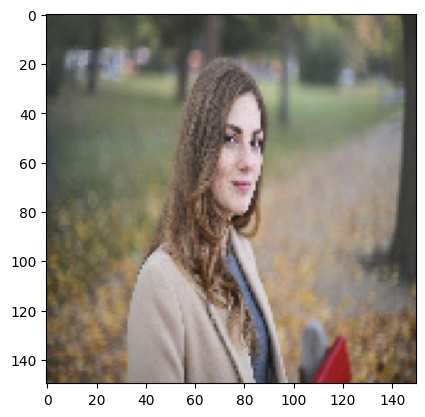

1/1 [==============================] - 0s 27ms/step
00000002.jpg
1


In [9]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import keras.utils as image
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  plt.imshow(img)
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x=x/255
  images = np.vstack([x])
  #images=preprocess_input(images)

  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes.argmax())

In [13]:
model.save("/content/drive/MyDrive/test/tmp/rps.h5")

In [14]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/test/tmp/rps.h5')

In [15]:
tfjs.converters.save_keras_model(model, 'models')

In [18]:
!zip -r /content/drive/MyDrive/test/model /content/models

  adding: content/models/ (stored 0%)
  adding: content/models/group1-shard39of46.bin (deflated 8%)
  adding: content/models/group1-shard40of46.bin (deflated 8%)
  adding: content/models/group1-shard18of46.bin (deflated 8%)
  adding: content/models/model.json (deflated 96%)
  adding: content/models/group1-shard35of46.bin (deflated 8%)
  adding: content/models/group1-shard10of46.bin (deflated 8%)
  adding: content/models/group1-shard43of46.bin (deflated 8%)
  adding: content/models/group1-shard22of46.bin (deflated 8%)
  adding: content/models/group1-shard29of46.bin (deflated 8%)
  adding: content/models/group1-shard28of46.bin (deflated 8%)
  adding: content/models/group1-shard32of46.bin (deflated 8%)
  adding: content/models/group1-shard45of46.bin (deflated 8%)
  adding: content/models/group1-shard19of46.bin (deflated 8%)
  adding: content/models/group1-shard20of46.bin (deflated 8%)
  adding: content/models/group1-shard14of46.bin (deflated 8%)
  adding: content/models/group1-shard37of46